In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('COVID-19.csv')


In [3]:

day=df.day
month = df.month
year=df.year
cases=df.cases
deaths=df.deaths
country=df.countriesAndTerritories
Exp = df.continentExp

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


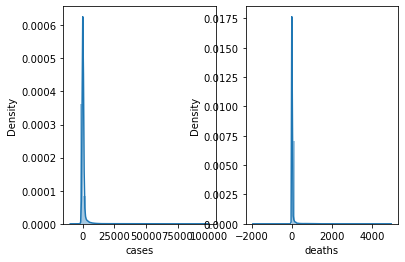

In [4]:
#b) Vẽ 2 đồ thị histogram của columns casses và deaths trên cùng một cửa sổ (figure). (subplot)
plt.subplot(1,2,1)
sns.distplot(cases);
plt.subplot(1,2,2)
sns.distplot(deaths);
plt.show()

In [5]:
#c)Thống kê tổng số cases và deaths của từng quốc gia.
x=list(set(country))
for i in range(len(x)):
    a = df.loc[(country == x[i])].cases.sum()
    b = df.loc[(country == x[i])].deaths.sum()
    print(x[i] ,'-cases:',a,'- deaths:',b)

Suriname -cases: 5133 - deaths: 109
Bosnia_and_Herzegovina -cases: 34661 - deaths: 997
Ethiopia -cases: 89860 - deaths: 1365
Andorra -cases: 3623 - deaths: 62
Belize -cases: 2833 - deaths: 45
Malta -cases: 4737 - deaths: 45
United_Kingdom -cases: 741212 - deaths: 43726
Burundi -cases: 549 - deaths: 1
Cambodia -cases: 285 - deaths: 0
Finland -cases: 13555 - deaths: 351
Aruba -cases: 4334 - deaths: 34
Bhutan -cases: 330 - deaths: 0
Slovenia -cases: 14477 - deaths: 164
Turkey -cases: 349519 - deaths: 9371
Namibia -cases: 12326 - deaths: 131
Israel -cases: 304876 - deaths: 2263
Oman -cases: 110594 - deaths: 1114
Ireland -cases: 50993 - deaths: 1852
Anguilla -cases: 3 - deaths: 0
Lesotho -cases: 1833 - deaths: 42
Iran -cases: 534631 - deaths: 30712
Peru -cases: 870876 - deaths: 33820
Cayman_Islands -cases: 235 - deaths: 1
Montenegro -cases: 15760 - deaths: 240
Sri_Lanka -cases: 5625 - deaths: 13
Djibouti -cases: 5469 - deaths: 61
Gambia -cases: 3655 - deaths: 118
Falkland_Islands_(Malvinas)

In [6]:
#d) Vẽ biểu đồ bar biểu diễn tổng case của 10 quốc gia có 
#tổng cases lớn nhất.(Bằng 2 cách pandas, seaborn trên cùng figure).


d=df.groupby('countriesAndTerritories')['cases'].sum()
d1=d.sort_values(ascending=False).head(10)
dt=pd.DataFrame(d1)

data = pd.DataFrame(dt.index)
data['cases']=dt.cases
for i in range(10):
    data.cases[i]=dt.cases[i]
data

<ipython-input-6-8e60c4d3ba0e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.cases[i]=dt.cases[i]


,countriesAndTerritories,cases
0,United_States_of_America,8214755.0
1,India,7597063.0
2,Brazil,5250727.0
3,Russia,1415316.0
4,Argentina,1002649.0
5,Spain,974449.0
6,Colombia,965883.0
7,France,910277.0
8,Peru,870876.0
9,Mexico,854926.0


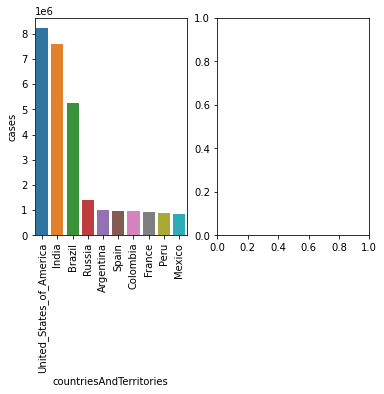

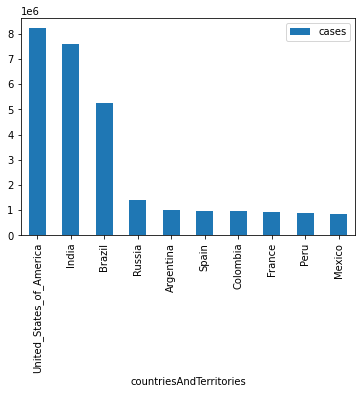

In [7]:

plt.subplot(1,2,1)
sns.barplot(x='countriesAndTerritories',y='cases',data=data)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
dt.plot(kind='bar')
plt.show()

<ipython-input-8-3543d1e7aa65>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.deaths[i]=dt.deaths[i]


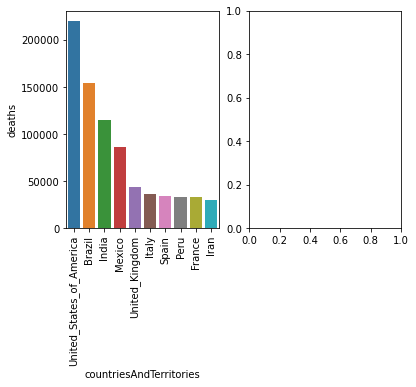

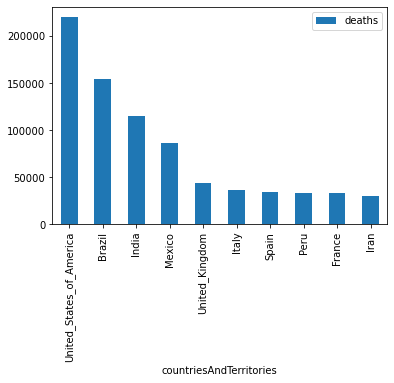

In [8]:
#e) biểu diễn tổng deaths của 10 quốc gia có tổng death lớn nhất.
d=df.groupby('countriesAndTerritories')['deaths'].sum()
d1=d.sort_values(ascending=False).head(10)
dt=pd.DataFrame(d1)

data = pd.DataFrame(dt.index)
data['deaths']=dt.deaths
for i in range(10):
    data.deaths[i]=dt.deaths[i]
    
plt.subplot(1,2,1)
sns.barplot(x='countriesAndTerritories',y='deaths',data=data)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
dt.plot(kind='bar')
plt.show()

In [9]:

#f)
y=list(set(Exp))
for i in range(len(y)):
    a1 = df.loc[( Exp== y[i])].cases.sum()
    b1 = df.loc[(Exp == y[i])].deaths.sum()
    print(y[i] ,'-cases:',a1,'- deaths:',b1)

America -cases: 18977833 - deaths: 611701
Africa -cases: 1656480 - deaths: 39931
Europe -cases: 7284085 - deaths: 242594
Oceania -cases: 37214 - deaths: 1021
Asia -cases: 12516197 - deaths: 224029
Other -cases: 696 - deaths: 7


In [10]:
#g) Vẽ biểu đồ bar để biểu diễn câu f) (mô tả : Trục ngang là các continentExp , mỗi continentExp có 2 cột biểu diễn cases và deaths)
#(Cả 2 cách pandas và seaborn trên cùng figure).

In [11]:
e=df.groupby('continentExp')['cases'].sum()
f=df.groupby('continentExp')['deaths'].sum()
f1=f.sort_values(ascending=False)
e1=e.sort_values(ascending=False)
et=pd.DataFrame(e1)
ft=pd.DataFrame(f1)
et['deaths']=ft
et['continentExp']=et.index
data=et
data

,cases,deaths,continentExp
continentExp,,,
America,18977833,611701,America
Asia,12516197,224029,Asia
Europe,7284085,242594,Europe
Africa,1656480,39931,Africa
Oceania,37214,1021,Oceania
Other,696,7,Other


<AxesSubplot:ylabel='continentExp'>

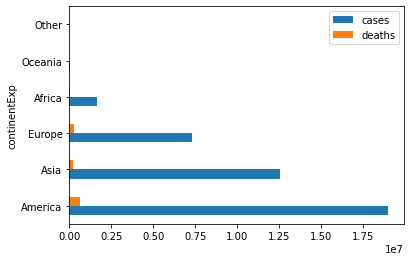

In [12]:
#pandas
data.plot.barh()

<AxesSubplot:xlabel='cases', ylabel='continentExp'>

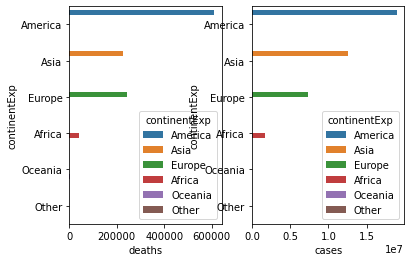

In [13]:
#seaborn
plt.subplot(1,2,1)
sns.barplot(x='deaths',y="continentExp", data=data,hue='continentExp')
plt.subplot(1,2,2)
sns.barplot(x='cases',y="continentExp", data=data,hue='continentExp')

In [14]:
#h) Trích data có columns là Việt Nam.
VN=df.loc[(country == 'Vietnam') & (year > 2019),['day','month','cases','deaths','countriesAndTerritories']]
VN

,day,month,cases,deaths,countriesAndTerritories
49109,20,10,6,0,Vietnam
49110,19,10,8,0,Vietnam
49111,18,10,2,0,Vietnam
49112,17,10,0,0,Vietnam
49113,16,10,2,0,Vietnam
...,...,...,...,...,...
49394,5,1,0,0,Vietnam
49395,4,1,0,0,Vietnam
49396,3,1,0,0,Vietnam
49397,2,1,0,0,Vietnam


In [15]:
#i
num=list(set(VN.month))
for i in range(len(num)):
    VN_cases = VN.loc[(VN.month == num[i])].cases.sum()
    VN_death = VN.loc[(VN.month == num[i])].deaths.sum()
    print('month',i+1,'- cases:',VN_cases,'-deaths:',VN_death)

month 1 - cases: 5 -deaths: 0
month 2 - cases: 11 -deaths: 0
month 3 - cases: 190 -deaths: 0
month 4 - cases: 64 -deaths: 0
month 5 - cases: 57 -deaths: 0
month 6 - cases: 28 -deaths: 0
month 7 - cases: 154 -deaths: 0
month 8 - cases: 531 -deaths: 32
month 9 - cases: 54 -deaths: 3
month 10 - cases: 46 -deaths: 0


In [16]:
#j) Vẽ biểu đồ đường để biểu i) (đồ thị gồm 2 line) 
#và chú thích điểm lớn nhất trên từng line. (Dùng pandas hoặc seaborn).
#Pandas


<AxesSubplot:xlabel='month', ylabel='cases'>

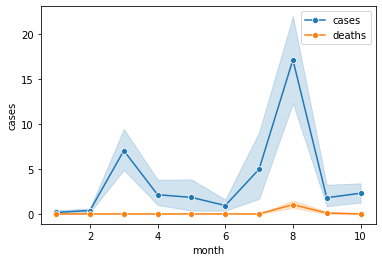

In [17]:
sns.lineplot(data=VN, x="month", y="cases", marker = 'o',label='cases')
sns.lineplot(data=VN, x="month", y="deaths", marker = 'o',label='deaths')